In [ ]:
import pandas as pd
import numpy as np

##### 数据查看

In [121]:
# 附件一至附件四
data1 = pd.read_excel("CUMCM2023Problems/C题/6 个蔬菜品类的商品信息.xlsx")
data2 = pd.read_excel("CUMCM2023Problems/C题/销售流水明细数据.xlsx")
data3 = pd.read_excel("CUMCM2023Problems/C题/蔬菜类商品的批发价格.xlsx")
data4 = pd.read_excel("CUMCM2023Problems/C题/蔬菜类商品的近期损耗率.xlsx")

In [123]:
print(data1.columns)
print(data2.columns)
print(data3.columns)
print(data4.columns)
data4

Index(['单品编码', '单品名称', '分类编码', '分类名称'], dtype='object')
Index(['销售日期', '扫码销售时间', '单品编码', '销量(千克)', '销售单价(元/千克)', '销售类型', '是否打折销售'], dtype='object')
Index(['日期', '单品编码', '批发价格(元/千克)'], dtype='object')
Index(['小分类编码', '小分类名称', '平均损耗率(%)_小分类编码_不同值'], dtype='object')


,小分类编码,小分类名称,平均损耗率(%)_小分类编码_不同值
0,1011010201,花菜类,15.51
1,1011010402,水生根茎类,13.65
2,1011010101,花叶类,12.83
3,1011010801,食用菌,9.45
4,1011010504,辣椒类,9.24
5,1011010501,茄类,6.68


In [131]:
data2[data2['是否打折销售'] == '是'][['销售日期', '扫码销售时间']].value_counts()

销售日期        扫码销售时间      
2021-08-15  11:45:26.233    2
2020-07-01  13:10:00.170    1
2022-09-28  19:21:04.405    1
            17:58:01.589    1
            18:24:14.777    1
                           ..
2021-10-24  15:56:30.756    1
            17:00:41.951    1
            17:05:07.933    1
            17:09:57.735    1
2023-06-30  21:32:10.219    1
Name: count, Length: 47365, dtype: int64

In [ ]:
# 附件二切分demo，便于编程，最终应删去
data2_replace = data2.sample(100000)

# 合并表一与表二
datas_replace = pd.merge(data2_replace, data1, how='left', on='单品编码')
datas = pd.merge(data2, data1, how='left', on='单品编码')

x = data2['销售日期'].value_counts().keys().sort_values()
y1 = data1['单品编码'].value_counts().keys().tolist()
y2 = data1['分类编码'].value_counts().keys().tolist()
# datas=[data1,data2,data3,data4]

##### 清洗数据（未发现异常数据，暂时没有此步骤）

In [ ]:
# for i in datas:
#     for j in i.columns:
#         print(i[j].value_counts())

### 问题一

In [ ]:
# # 获得每日销售总量
# Totaldailysales = pd.DataFrame(
#     columns=['销售日期', '销量(千克)', '单品编码/分类编码', '单品名称', '分类编码', '分类名称'])
# Totaldailysales.set_index(['销售日期', '单品编码/分类编码'], drop=True, inplace=True)
# for i in datas['销售日期'].value_counts().keys():
#     daydata = datas[datas['销售日期'] == i]
#     for j in daydata['单品编码'].value_counts().keys():
#         daydata1 = daydata[daydata['单品编码'] == j]
#         Totaldailysales.loc[(i, j), :] = [sum(daydata1['销量(千克)'])] + daydata1.iloc[0][
#             ['单品名称', '分类编码', '分类名称']].tolist()
#     for j in daydata['分类编码'].value_counts().keys():
#         daydata2 = daydata[daydata['分类编码'] == j]
#         Totaldailysales.loc[(i, j), :] = [sum(daydata2['销量(千克)'])] + [None] + daydata2.iloc[0][
#             ['分类编码', '分类名称']].tolist()
# # 获得每日销售总量
# Totaldailysales_replace = pd.DataFrame(
#     columns=['销售日期', '销量(千克)', '单品编码/分类编码', '单品名称', '分类编码', '分类名称'])
# Totaldailysales_replace.set_index(['销售日期', '单品编码/分类编码'], drop=True, inplace=True)
# for i in datas_replace['销售日期'].value_counts().keys():
#     daydata = datas_replace[datas['销售日期'] == i]
#     for j in daydata['单品编码'].value_counts().keys():
#         daydata1 = daydata[daydata['单品编码'] == j]
#         Totaldailysales_replace.loc[(i, j), :] = [sum(daydata1['销量(千克)'])] + daydata1.iloc[0][
#             ['单品名称', '分类编码', '分类名称']].tolist()
#     for j in daydata['分类编码'].value_counts().keys():
#         daydata2 = daydata[daydata['分类编码'] == j]
#         Totaldailysales_replace.loc[(i, j), :] = [sum(daydata2['销量(千克)'])] + [None] + daydata2.iloc[0][
#             ['分类编码', '分类名称']].tolist()
# 
# #补充Totaldailysales表
# for i in y1+y2:
#     for j in x:
#         try:
#             Totaldailysales.loc[(j, i)]
#         except:
#             Totaldailysales.loc[(j, i), :] = [0, None, None, None]

In [ ]:
# 获得每日销售总量
Totaldailysales = pd.DataFrame(columns=['销售日期'] + y1 + y2)

Totaldailysales.set_index(['销售日期'], drop=True, inplace=True)
for i in x:
    daydata = datas[datas['销售日期'] == i]
    for j in daydata['单品编码'].value_counts().keys():
        daydata1 = daydata[daydata['单品编码'] == j]
        Totaldailysales.loc[i, j] = sum(daydata1['销量(千克)'])
    for j in daydata['分类编码'].value_counts().keys():
        daydata2 = daydata[daydata['分类编码'] == j]
        Totaldailysales.loc[i, j] = sum(daydata2['销量(千克)'])


In [44]:
Totaldailysales

,102900005115168,102900011032367,102900011031735,102900011031742,102900011031759,102900011032022,102900011032145,102900011032206,102900011032213,102900011032220,...,102900011035481,102900011035764,102900011035771,106973990980123,1011010101,1011010801,1011010504,1011010402,1011010501,1011010201
销售日期,,,,,,,,,,,,,,,,,,,,,
2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,205.402,35.365,76.715,4.85,35.374,46.64
2020-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,198.362,48.51,66.064,4.6,32.199,43.943
2020-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,190.779,42.442,64.253,9.572,35.896,42.076
2020-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,236.587,47.262,81.282,5.439,57.067,55.662
2020-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,223.899,73.213,98.496,4.019,61.816,55.474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.524,39.582,72.185,10.384,21.224,8.083
2023-06-27,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,127.278,38.708,67.12,16.454,8.415,14.272
2023-06-28,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,130.182,53.742,68.534,14.946,15.651,16.069


###### 可视化,横坐标为每一天，纵坐标为当天的销售总额（kg)，这里的是分类（6类）绘图，将第7行改为y1即为对每一个单品绘图（太多了点）

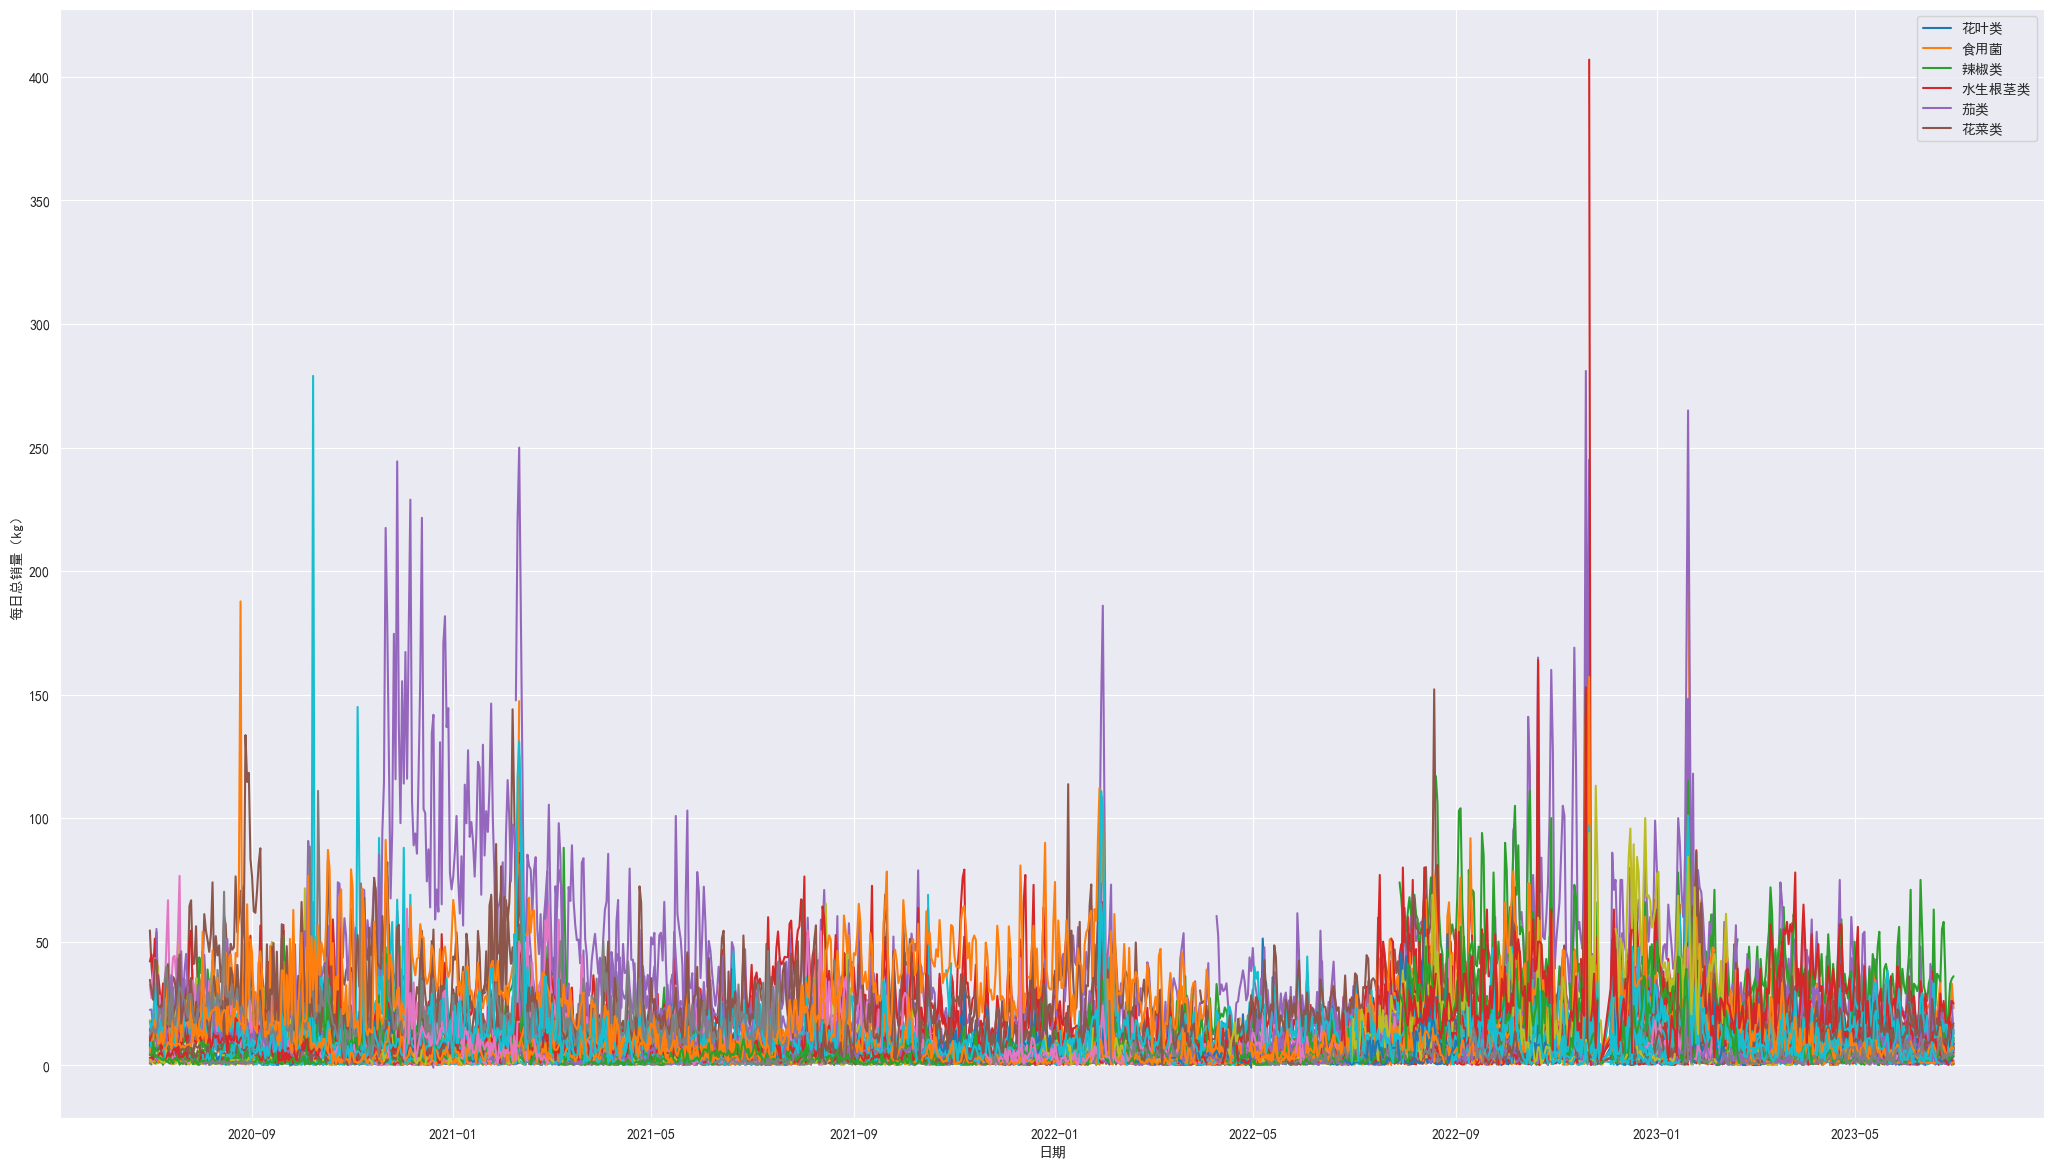

In [127]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(25.60, 14.40))
lines = []
j = 0
# for i in y1:
for i in y2:
    y = []
    j = j + 1
    line, = plt.plot(x, Totaldailysales[i])
    lines.append(line)
# plt.xticks(rotation=90)
plt.legend(handles=lines, labels=['花叶类', '食用菌', '辣椒类', '水生根茎类', '茄类', '花菜类'], loc='best')
plt.xlabel('日期')
plt.ylabel('每日总销量（kg）')
plt.show()

###### y1出现尖峰，检查发现为2022-11-21日，2022-11-21,102900005118831,407.0,娃娃菜,1011010101,花叶类，买了407kg娃娃菜。是否需要剔除？

###### y2出现尖峰，检查发现为2022-11-19日，不知道为什么这一天的流水多了很多，其他时候是1000单上下，这一天到了3000单，但是没有发现哪一单有问题的，应该单纯成交量大

In [118]:
import scipy.stats as stats
import numpy as np
import pandas as pd

Averagedailyvolume = pd.DataFrame(columns=['单品编码/分类编码', '平均每日销量(千克)'])
Averagedailyvolume.set_index(['单品编码/分类编码'], drop=True, inplace=True)
Totaldays = Totaldailysales.shape[0]
for i in y2:
    Averagedailyvolume.loc[i, '平均每日销量(千克)'] = np.nansum(Totaldailysales[i]) / Totaldays
    # Averagedailyvolume.loc[i,'平均每日销量(千克)']=np.nanmean(Totaldailysales[i])
Averagedailyvolume.dropna(axis=0, how='all', inplace=True)
Averagedailyvolume

,平均每日销量(千克)
单品编码/分类编码,
1011010101,182.968643
1011010801,70.126014
1011010504,84.413483
1011010402,37.402169
1011010501,20.674453
1011010201,38.494425


###### 数据标准化

In [113]:
from sklearn.preprocessing import StandardScaler

transfer = StandardScaler()
Averagedailyvolume = transfer.fit_transform(
    np.array([Averagedailyvolume.index, Averagedailyvolume['平均每日销量(千克)']]).T)

##### levene检验，Brown-Forsythe检验，

In [119]:
edu = [Averagedailyvolume.index, Averagedailyvolume['平均每日销量(千克)']]
# edu=[Averagedailyvolume[:,0], Averagedailyvolume[:,1]]
# levene检验
(levene_W, levene_p) = stats.levene(*edu)
print(levene_W, levene_p)

# Brown-Forsythe检验
(Brown_W, Brown_p) = stats.levene(edu[0], edu[1], center='median')
print(Brown_W, Brown_p)
# f检验
f_value, p_value = stats.f_oneway(edu[0], edu[1])
print("F-value:", f_value)
print("P-value:", p_value)

5.035169269182152 0.048679528207514346
5.035169269182152 0.048679528207514346
F-value: 93873241546980.9
P-value: 3.3759150536502294e-66


###### 方差分析

In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from statsmodels.formula.api import ols
# from scipy.stats import levene
# from scipy.stats import kstest
# from statsmodels.stats.anova import anova_lm  #方差分析
# from statsmodels.stats.multicomp import pairwise_tukeyhsd  #两两比较
# import pingouin as pg
# 
# 
# def anova_d(column, data):
#     if levene_p.pvalue > 0.05:
#         formula = column + "~ C(market_type)"
#         model = anova_lm(ols(formula, data=data).fit())
#         print(model)
#         re = pairwise_tukeyhsd(data[column], data['market_type'], alpha=0.05)
#         print('多重比较：')
#         print(re.summary())
#     else:
#         model = pg.welch_anova(dv=column, between='market_type', data=data)
#         print(model)
#         print('多重比较：')
#         print(pg.pairwise_gameshowell(dv=column, between='market_type', data=data))

In [ ]:
# import scipy.stats as stats
# import numpy as np
# import pandas as pd
# 
# for i in data2['单品编码'].value_counts().keys():
#     # levene检验（未通过）
#     (W, p) = stats.levene(data2[data2['单品编码'] == i]['销量(千克)'])
#     print(W, p)
# 
#     # Brown-Forsythe检验（未通过）
#     (W, p) = stats.levene(data2[data2['单品编码'] == i]['销量(千克)'], center='median')
#     print(W, p)
# 
#     f_value, p_value = stats.f_oneway(data2[data2['单品编码'] == i]['销量(千克)'])
#     print("F-value:", f_value)
#     print("P-value:", p_value)

In [ ]:
# #两组数对比时，检查独立T检验和F检验是否一致
# 
# # First, calculate the F- and the T-values, ...
# F_statistic, pVal = stats.f_oneway(data2['单品编码'], data2['销量(千克)'])
# t_val, pVal_t = stats.ttest_ind(data2['单品编码'], data2['销量(千克)'])
# 
# # ... and show that t**2 = F
# print('\nT^2 == F: ------------------------------------------')
# print(('From the t-test we get t^2={0:5.3f}, and from the F-test F={1:5.3f}'.format(t_val ** 2, F_statistic)))
# 
# # numeric test
# np.testing.assert_almost_equal(t_val ** 2, F_statistic, decimal=0)
# 
# print(F_statistic)


###### 无法通过levene检验（方差齐次），不太适合方差分析

###### 可视化,关系矩阵热力图，将第4行改为y1即为对每一个单品绘图（基本没法看）

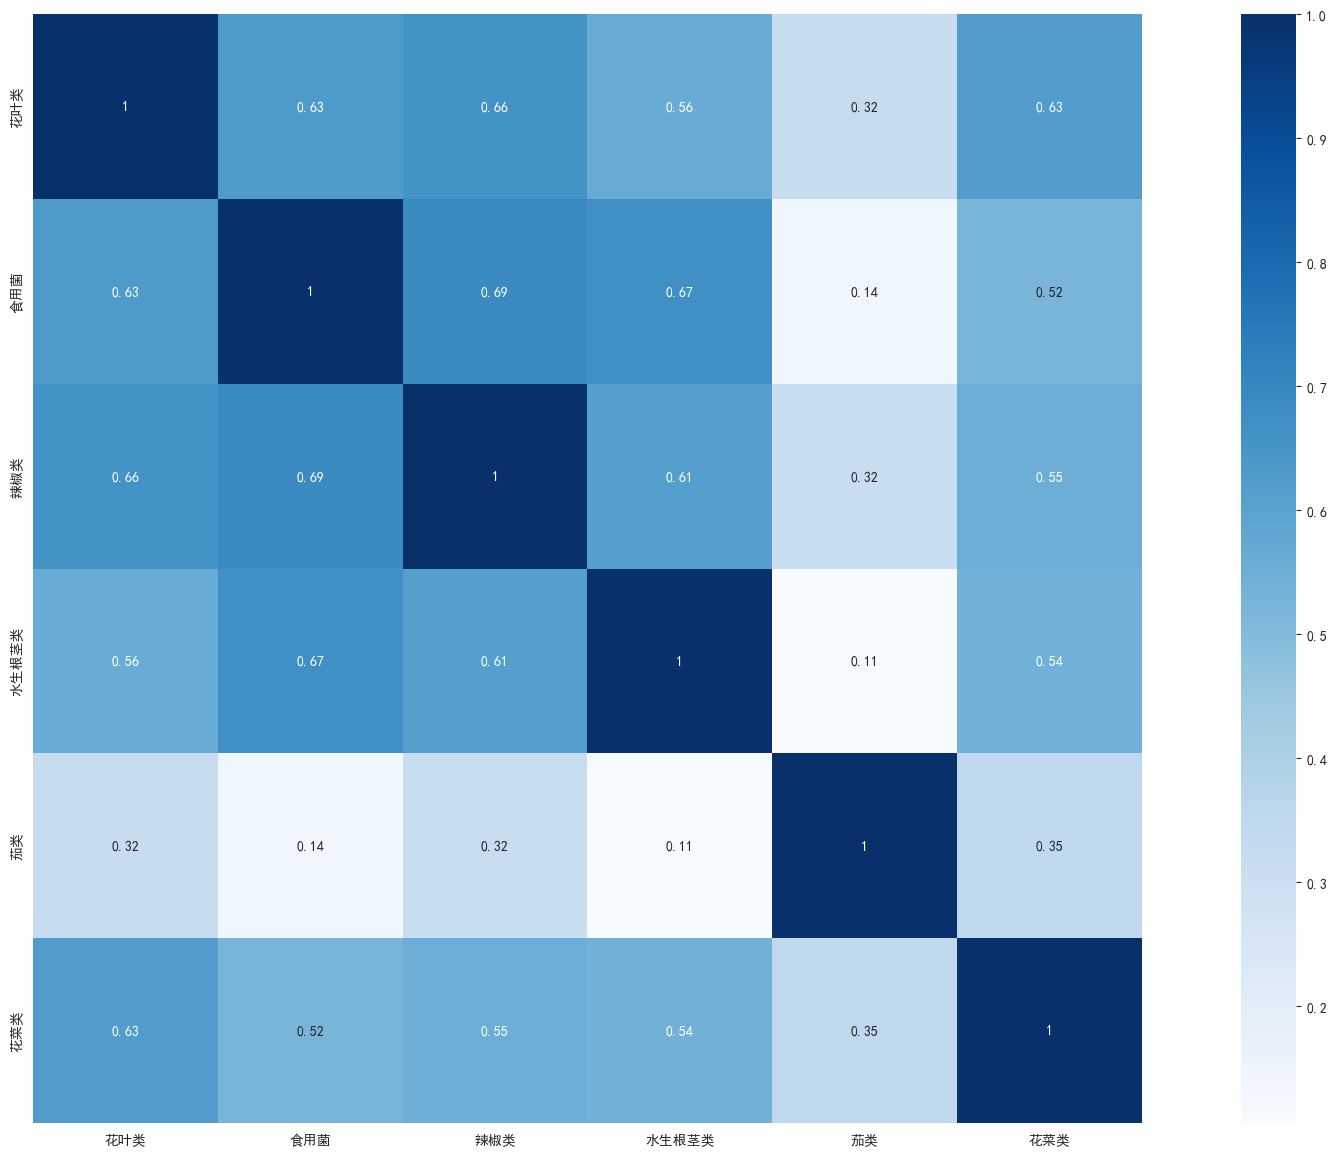

In [28]:
import seaborn as sns

Correlationmatrix = pd.DataFrame()
# for i in y1:
for i in y2:
    name = data1[data1['分类编码'] == i]['分类名称'].iloc[0]
    Correlationmatrix[name] = Totaldailysales[i]
plt.figure(figsize=(25.60, 14.40))
sns.heatmap(Correlationmatrix.corr(), annot=True, vmax=1, square=True, cmap="Blues")
plt.show()

##### 对每一单品进行相关矩阵计算

In [29]:
import seaborn as sns

Correlationmatrix = pd.DataFrame()
for i in y1:
    name = data1[data1['单品编码'] == i]['单品名称'].iloc[0]
    Correlationmatrix[name] = Totaldailysales[i]

Correlationmatrix.corr()

C:\Users\dell\AppData\Local\Temp\ipykernel_3088\2845858013.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Correlationmatrix[name] = Totaldailysales[i]
C:\Users\dell\AppData\Local\Temp\ipykernel_3088\2845858013.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Correlationmatrix[name] = Totaldailysales[i]
C:\Users\dell\AppData\Local\Temp\ipykernel_3088\2845858013.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

,牛首生菜,红灯笼椒(2),七彩椒(份),灯笼椒(份),红灯笼椒(份),小皱皮(份),芜湖青椒(份),青杭椒(份),红杭椒(份),水果辣椒(份),...,小白菜(份),小青菜(份),奶白菜(份),芝麻苋菜,鲜粽叶,鲜粽叶(袋)(1),外地茼蒿(份),龙牙菜,黄白菜(1),和丰阳光海鲜菇(包)
牛首生菜,1.000000,NaN,NaN,NaN,0.542235,0.145554,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
红灯笼椒(2),NaN,1.000000,NaN,NaN,NaN,0.374387,NaN,0.143506,0.341231,0.018438,...,-0.038231,0.191534,0.073588,NaN,NaN,NaN,0.243849,0.091817,0.260837,-0.878861
七彩椒(份),NaN,NaN,1.0,0.5,NaN,0.034826,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
灯笼椒(份),NaN,NaN,0.5,1.0,-0.500000,-0.960769,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
红灯笼椒(份),0.542235,NaN,NaN,-0.5,1.000000,-0.155543,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
鲜粽叶(袋)(1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.884391,1.0,NaN,NaN,NaN,NaN
外地茼蒿(份),NaN,0.243849,NaN,NaN,NaN,-0.220409,NaN,-0.114708,0.077604,NaN,...,0.240098,0.080620,-0.088601,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
龙牙菜,NaN,0.091817,NaN,NaN,NaN,0.397807,NaN,NaN,0.048179,NaN,...,NaN,0.256459,0.508038,NaN,NaN,NaN,NaN,1.000000,0.513354,NaN
黄白菜(1),NaN,0.260837,NaN,NaN,NaN,0.290179,NaN,NaN,0.095049,NaN,...,NaN,0.130690,0.604893,NaN,NaN,NaN,NaN,0.513354,1.000000,NaN


##### eta系数检测

In [203]:
# def correlation_ratio(component, total):
#     y_component_avg = np.mean(component)
#     y_total_avg = np.mean(total)
#     numerator = np.sum(np.power(np.subtract(total, y_component_avg), 2))
#     denominator = np.sum(np.power(np.subtract(total, y_total_avg), 2))
#     if denominator == 0:
#         eta = 0.0
#     else:
#         eta = numerator / denominator
#     return 1 - eta
# 
# 
# import numpy as np
# from scipy import stats
# 
# for i in y2:
#     categorylist = data1[data1['分类编码'] == i]['单品编码'].value_counts().keys().tolist()
#     print('************************', data1[data1['分类编码'] == i]['分类名称'].iloc[0], ':***************************')
#     print(stats.kstest(np.log(data2[data2['单品编码'].isin(categorylist)]['销量(千克)']), 'norm'))
#     # for j in categorylist:
#     # print(data1[data1['单品编码']==j]['单品名称'].iloc[0])
#     # print(KStest(data2[data2['单品编码'] == j]['销量(千克)']))
#     # print(correlation_ratio(data2[data2['单品编码'] == j]['销量(千克)'],
#     #                         data2[data2['单品编码'].isin(categorylist)]['销量(千克)']))
#     print(stats.kstest((data2[data2['单品编码'].isin(categorylist)]['销量(千克)']),'norm'))


************************ 花叶类 :***************************
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1)
KstestResult(statistic=0.5496687927730124, pvalue=0.0, statistic_location=0.167, statistic_sign=-1)
************************ 食用菌 :***************************
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1)


B:\anaconda3\envs\Mathematical_modeling\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KstestResult(statistic=0.5202027015132912, pvalue=0.0, statistic_location=0.071, statistic_sign=-1)
************************ 辣椒类 :***************************
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1)
KstestResult(statistic=0.5073608930328556, pvalue=0.0, statistic_location=0.029, statistic_sign=-1)
************************ 水生根茎类 :***************************
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1)
KstestResult(statistic=0.5557773521297693, pvalue=0.0, statistic_location=0.167, statistic_sign=-1)
************************ 茄类 :***************************
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1)
KstestResult(statistic=0.5628892697758663, pvalue=0.0, statistic_location=0.2, statistic_sign=-1)
************************ 花菜类 :***************************
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1)
KstestResult(statistic=0.575641637069

### 第二问